In [1]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
datos

,title,abstract,categorical,categoria,cat_one_hot,abstract_limpio,abstract_preprocesado
0,Electromagnetic neutrinos in laboratory experi...,An overview of neutrino electromagnetic proper...,astrophysics,humano,"[1, 0, 0, 0, 0]",An overview of neutrino electromagnetic proper...,"['overview', 'neutrino', 'electromagnetic', 'p..."
1,Infrared complex refractive index of astrophys...,In dense and cold regions of the interstellar ...,astrophysics,humano,"[1, 0, 0, 0, 0]",In dense and cold regions of the interstellar ...,"['dense', 'cold', 'region', 'interstellar', 'm..."
2,Gamma-ray lines in modern astrophysics,Gamma-ray astronomy provides a direct window i...,astrophysics,humano,"[1, 0, 0, 0, 0]",Gamma-ray astronomy provides a direct window i...,"['gamma-ray', 'astronomy', 'provides', 'direct..."
3,From Coulomb excitation cross sections to non-...,Coulomb and nuclear dissociation of $^{17}$Ne ...,astrophysics,humano,"[1, 0, 0, 0, 0]",Coulomb and nuclear dissociation of $^{17}$Ne ...,"['coulomb', 'nuclear', 'dissociation', 'ne', '..."
4,Astrophysical Black Holes: A Compact Pedagogic...,Black holes are among the most extreme objects...,astrophysics,humano,"[1, 0, 0, 0, 0]",Black holes are among the most extreme objects...,"['black', 'hole', 'among', 'extreme', 'object'..."
...,...,...,...,...,...,...,...
7745,Superconducting LaAlO3/SrTiO3 Nanowires,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe've achieved a groundbreaking breakthrou...,"[""'ve"", 'achieved', 'groundbreaking', 'breakth..."
7746,Coupling a single Nitrogen-Vacancy center to a...,Here's a rewritten version of the text in my o...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe propose a groundbreaking idea: connecti...,"['propose', 'groundbreaking', 'idea', 'connect..."
7747,Superconducting and Anti-Ferromagnetic Phases ...,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nThis study establishes a connection betwee...,"['study', 'establishes', 'connection', 'two', ..."
7748,New Superconductivity Dome in LaFeAsO$_{1-x}$F...,Here's the rewritten text:\n\nA fascinating ph...,superconductivity,llama3,"[0, 0, 0, 0, 1]",Here's the rewritten text:\n\nA fascinating ph...,"[""'s"", 'rewritten', 'text', 'fascinating', 'ph..."


In [3]:
columnas_seleccionadas  = ['abstract_limpio','categoria']
nuevo_dataframe = datos[columnas_seleccionadas]
nuevo_dataframe
etiquetas = datos['cat_one_hot'].tolist()

In [5]:
from simpletransformers.language_representation import RepresentationModel

sentences = nuevo_dataframe['abstract_limpio'].tolist()

model = RepresentationModel(
    model_type = "bert",
    model_name = "bert-base-uncased",
    use_cuda = True
)

sentence_vectors = model.encode_sentences(sentences, combine_strategy = "mean")

sentence_vectors.shape

bert_embeddings = pd.DataFrame(sentence_vectors)
bert_embeddings['cat_one_hot'] = etiquetas
bert_embeddings.to_csv('bert_embeddings.csv', index=False)
# Verificar el DataFrame
print(bert_embeddings)

             0         1         2         3         4         5         6  \
0    -0.013674  0.111425  0.237437 -0.098444  0.163423 -0.533279  0.038910   
1    -0.104987  0.263603  0.566978 -0.070036  0.093651 -0.369724 -0.216975   
2     0.035353  0.267114  0.163614 -0.156457  0.037607 -0.291899  0.046625   
3    -0.242217  0.112208  0.520112 -0.124854  0.168238 -0.225159 -0.133132   
4    -0.212134  0.358539  0.350500 -0.159084  0.112897 -0.452505 -0.033394   
...        ...       ...       ...       ...       ...       ...       ...   
7745 -0.189454  0.014996  0.357838 -0.151720  0.076351 -0.338279 -0.162136   
7746 -0.140255  0.090512  0.363076 -0.134300  0.110519 -0.332585 -0.057912   
7747 -0.176430  0.034984  0.321631 -0.104240  0.132963 -0.209141 -0.217979   
7748 -0.100617 -0.005616  0.558397 -0.124128  0.023132 -0.446914  0.091724   
7749 -0.010237 -0.017167  0.449863 -0.239641  0.196047 -0.313834  0.007040   

             7         8         9  ...       759       760    

In [6]:
n_components = 2 

etiquetas = etiquetas
sentence_vectors.shape

pca = PCA(n_components=n_components)
pca_matrix = pca.fit_transform(sentence_vectors)
print(pca_matrix)



[[ 2.4190512  -2.6156409 ]
 [-2.3543894  -1.3596934 ]
 [-1.9243506  -1.6959995 ]
 ...
 [-1.5470624   0.4971625 ]
 [-1.0835172  -0.45675412]
 [-0.5179613   1.0984555 ]]


In [7]:
import os

# Obtener el directorio actual
directorio_actual = os.getcwd()

print("El directorio actual es:", directorio_actual)

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Bert_embeddings


7750


<>:30: SyntaxWarning: invalid escape sequence '\P'
<>:30: SyntaxWarning: invalid escape sequence '\P'
C:\Users\David Soto\AppData\Local\Temp\ipykernel_36180\608653668.py:30: SyntaxWarning: invalid escape sequence '\P'
  directorio_actual = directorio_actual + "\PCA_Bert_embedding.png"


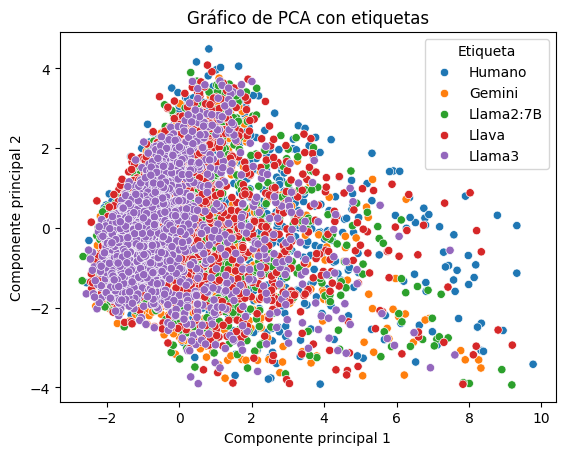

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_values = pca_matrix  # Esto es solo un ejemplo, asegúrate de tener tus valores PCA correctamente
etiquetas1 = etiquetas  # Asegúrate de tener tus etiquetas correctamente
nuevas_etiquetas = []
for et in etiquetas:
    if et == "[1, 0, 0, 0, 0]":
        nuevas_etiquetas.append("Humano")
    elif et == "[0, 1, 0, 0, 0]":
        nuevas_etiquetas.append("Gemini")
    elif et == "[0, 0, 1, 0, 0]":
        nuevas_etiquetas.append("Llama2:7B")
    elif et == "[0, 0, 0, 1, 0]":
        nuevas_etiquetas.append("Llava")
    elif et == "[0, 0, 0, 0, 1]":
        nuevas_etiquetas.append("Llama3")

print(len(nuevas_etiquetas))
        
# Crear un DataFrame con los valores PCA y las etiquetas
df = pd.DataFrame({'PC1': pca_values[:, 0], 'PC2': pca_values[:, 1], 'Etiqueta': nuevas_etiquetas})

# Graficar los valores PCA con seaborn
sns.scatterplot(x='PC1', y='PC2', hue='Etiqueta', data=df)
plt.title('Gráfico de PCA con etiquetas')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
# Guardar el gráfico como PNG
directorio_actual = directorio_actual + "\PCA_Bert_embedding.png"
plt.savefig(directorio_actual)
plt.show()

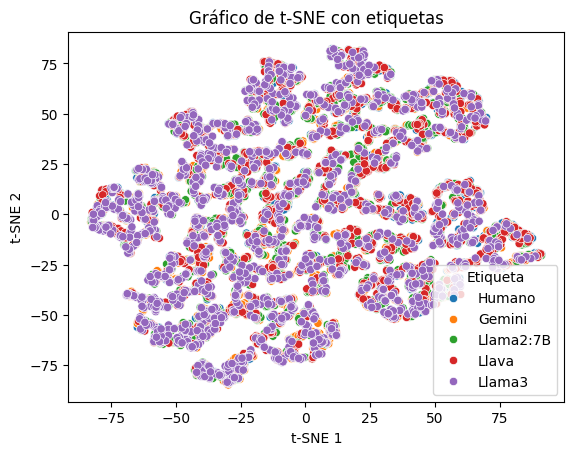

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tus datos están en la variable datos y las etiquetas en etiquetas
datos = pca_matrix  # Esto es solo un ejemplo, asegúrate de tener tus valores PCA correctamente
etiquetas1 = etiquetas  # Asegúrate de tener tus etiquetas correctamente

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
datos_tsne = tsne.fit_transform(datos)

# Crear un DataFrame con los valores t-SNE y las etiquetas
df = pd.DataFrame({'TSNE1': datos_tsne[:, 0], 'TSNE2': datos_tsne[:, 1], 'Etiqueta': nuevas_etiquetas})

# Graficar los valores t-SNE con seaborn
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Etiqueta', data=df)
plt.title('Gráfico de t-SNE con etiquetas')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# Obtener el directorio actual
directorio_actual = os.getcwd()
directorio_actual = directorio_actual + "\\t_SNE_Bert_embedding.png"
plt.savefig(directorio_actual)
plt.show()